Necessary Imports

In [ ]:
from data import Data
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

Functions for Label Manipulation in order to Give ROC and Confusion Matrix

In [2]:
def change_labels(target_label, labels):
    new_labels = np.zeros(labels.shape[0])
    for i in range(labels.shape[0]):
        if(labels[i]==target_label):
            new_labels[i]=1
    return new_labels

In [3]:
def convert_one_hot_to_normal_label(label):
    new_label = np.zeros(label.shape[0])
    for m in range(label.shape[0]):
        for i in range(label.shape[1]):
            if(label[m][i]!=0):
                new_label[m] = i
    return new_label

In [4]:
def convert_normal_to_one_hot_label(label):
    new_label = np.zeros((label.shape[0],10),dtype=np.uint8)
    for m in range(label.shape[0]):
        new_label[m,label[m]] = 1
    #print(new_label)
    return new_label

Reading Data

In [9]:
data = Data("data", verbose=False)

In [6]:
X_train, y_train = data.get_features()
X_test, y_test, y_hat_test_localization = data.get_test_images()

Saving Data for Later

In [9]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)
np.save('y_hat_test_localization.npy', y_hat_test_localization)

Loading Data if it is available from last experiments

In [5]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

Changing Labels for training 10 different Classifiers

In [ ]:
X_train = X_train.squeeze()
y_train = convert_one_hot_to_normal_label(y_train)

In [9]:
y_train0 = change_labels(0, y_train)
y_train1 = change_labels(1, y_train)
y_train2 = change_labels(2, y_train)
y_train3 = change_labels(3, y_train)
y_train4 = change_labels(4, y_train)
y_train5 = change_labels(5, y_train)
y_train6 = change_labels(6, y_train)
y_train7 = change_labels(7, y_train)
y_train8 = change_labels(8, y_train)
y_train9 = change_labels(9, y_train)                       

TRAINING

In [10]:
classifier0 = SVC(kernel='linear')
classifier0 = classifier0.fit(X_train, y_train0)

In [11]:
classifier1 = SVC(kernel='linear')
classifier1 = classifier1.fit(X_train, y_train1)

In [12]:
classifier2 = SVC(kernel='linear')
classifier2 = classifier2.fit(X_train, y_train2)

In [13]:
classifier3 = SVC(kernel='linear')
classifier3 = classifier3.fit(X_train, y_train3)

In [14]:
classifier4 = SVC(kernel='linear')
classifier4 = classifier4.fit(X_train, y_train4)

In [15]:
classifier5 = SVC(kernel='linear')
classifier5 = classifier5.fit(X_train, y_train5)

In [16]:
classifier6 = SVC(kernel='linear')
classifier6 = classifier6.fit(X_train, y_train6)

In [17]:
classifier7 = SVC(kernel='linear')
classifier7 = classifier7.fit(X_train, y_train7)

In [18]:
classifier8 = SVC(kernel='linear')
classifier8 = classifier8.fit(X_train, y_train8)

In [19]:
classifier9 = SVC(kernel='linear')
classifier9 = classifier9.fit(X_train, y_train9)

PREDICTING HARD LABELS

In [ ]:
predictions0 = classifier0.predict(X_test)
predictions1 = classifier1.predict(X_test)
predictions2 = classifier2.predict(X_test)
predictions3 = classifier3.predict(X_test)
predictions4 = classifier4.predict(X_test)
predictions5 = classifier5.predict(X_test)
predictions6 = classifier6.predict(X_test)
predictions7 = classifier7.predict(X_test)
predictions8 = classifier8.predict(X_test)
predictions9 = classifier9.predict(X_test)

CALCULATING SVM SCORES

In [ ]:
scores0 = classifier0.decision_function(X_test)
scores1 = classifier1.decision_function(X_test)
scores2 = classifier2.decision_function(X_test)
scores3 = classifier3.decision_function(X_test)
scores4 = classifier4.decision_function(X_test)
scores5 = classifier5.decision_function(X_test)
scores6 = classifier6.decision_function(X_test)
scores7 = classifier7.decision_function(X_test)
scores8 = classifier8.decision_function(X_test)
scores9 = classifier9.decision_function(X_test)

In [ ]:
scores0 = np.reshape(scores0,(100,50,1))
scores1 = np.reshape(scores1,(100,50,1))
scores2 = np.reshape(scores2,(100,50,1))
scores3 = np.reshape(scores3,(100,50,1))
scores4 = np.reshape(scores4,(100,50,1))
scores5 = np.reshape(scores5,(100,50,1))
scores6 = np.reshape(scores6,(100,50,1))
scores7 = np.reshape(scores7,(100,50,1))
scores8 = np.reshape(scores8,(100,50,1))
scores9 = np.reshape(scores9,(100,50,1))

In [ ]:
scores = np.concatenate((scores0,scores1,scores2,scores3,scores4,scores5,scores6,scores7,scores8,scores9),axis=2)

Predicting Test Labels According to the Scores Obtained Above

In [ ]:
real_predictions = np.zeros(100, dtype=np.uint32) 
scores_for_roc = np.zeros((100,10))
y_max_score_idx = []
for i in range(100):
    test_image = scores[i]
    real_scores = np.max(test_image, axis=0)
    max_scores = np.argmax(test_image, axis=0)
    scores_for_roc[i] = real_scores
    real_predictions[i] = np.argmax(real_scores)
    y_max_score_idx.append(max_scores[real_predictions[i]])

In [ ]:
y_gt=np.asarray([i[0] for i in y_test])

FOR VISUALIZATION PURPOSES!!!!
BELOW ROC CURVE  and CONFUSION MATRIX CODE IS DIRECTLY TAKEN and ADAPTED FROM: 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
and
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_gt, real_predictions)

class_names = ['Elephant','Chimpanzee','Antilop','Bison','Zebra','Starfish','Tiger','Cat','Dog','Eagle']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()



y_gt_1hot = convert_normal_to_one_hot_label(y_gt)
predictions_1hot = convert_normal_to_one_hot_label(real_predictions)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_gt_1hot[:, i], scores_for_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
plt.legend(loc="lower right")
plt.show()

In [ ]:

print(classification_report(y_gt, real_predictions))

In [ ]:
"Overall Accuracy", accuracy_score(y_gt, real_predictions)

In [ ]:
X_test.shape

In [ ]:
entries_pred = [tuple(line.split(",")) for line in open("data/test/predicted_bounding_box.txt", "r").readlines()]
y_hat_test_localization = []
for i, idx in enumerate(y_max_score_idx):
#    print(entries_pred[i*50+idx][1:])
    y_hat_test_localization.append(entries_pred[i*50+idx][1:])

In [ ]:
correctClasses = np.zeros((10, 1))
correctClass = 0
for i in range(100):
    
    startX, startY, endX, endY = y_test[i, 1:]
    startY_hat, startX_hat, endY_hat, endX_hat = y_hat_test_localization[i]
    
    startX, startY, endX, endY = int(startX), int(startY), int(endX), int(endY)
    startX_hat, startY_hat, endX_hat, endY_hat = int(startX_hat), int(startY_hat), int(endX_hat), int(endY_hat)
    #print("GT", startX, startY, endX, endY)
    #print("Pred", startX_hat, startY_hat, endX_hat, endY_hat)
    
    overlapX = max(0, min(endX, endX_hat) - max(startX, startX_hat))
    overlapY = max(0, min(endY, endY_hat) - max(startY, startY_hat))
    overlap = overlapX * overlapY
    
    area_original = (endX - startX) * (endY - startY)
    area_pred = (endX_hat - startX_hat) * (endY_hat - startY_hat)
    union = area_original + area_pred - overlap
    score = overlap/union
    #print(score)
    #print(overlapX, overlapY)
    #print(overlap)
    
    if score >= 0.5 and int(y_gt[i]) == int(real_predictions[i]):
        correctClasses[y_gt[i]] += 1
        correctClass += 1

correctClass / 100, correctClasses/10

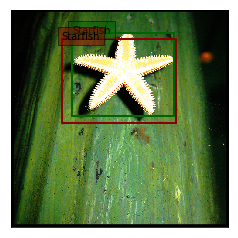

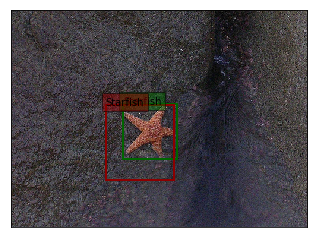

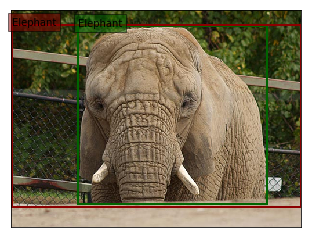

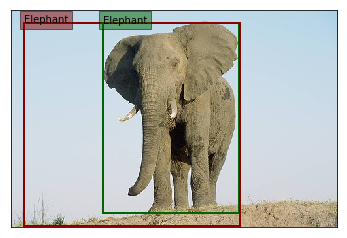

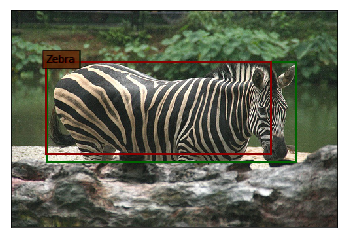

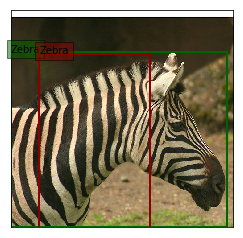

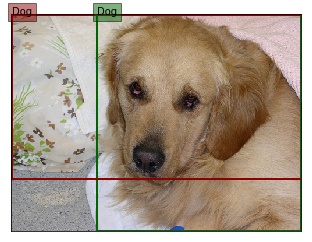

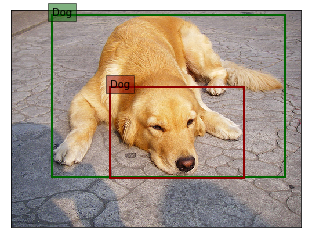

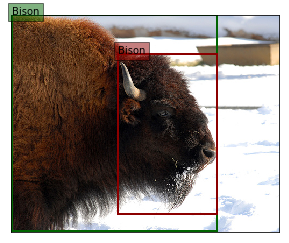

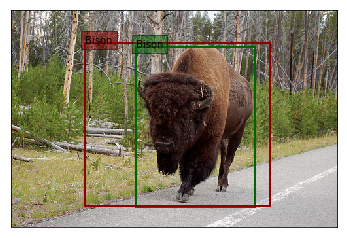

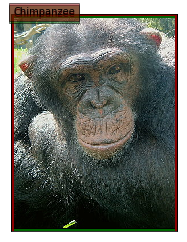

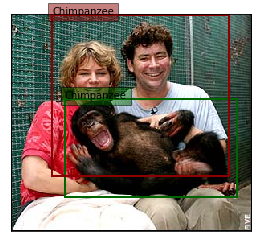

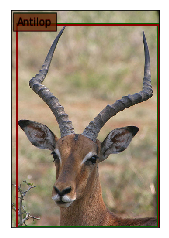

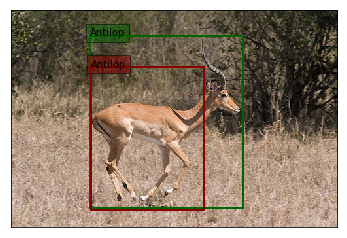

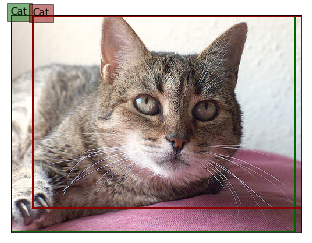

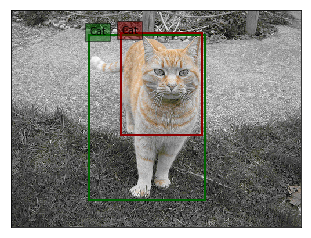

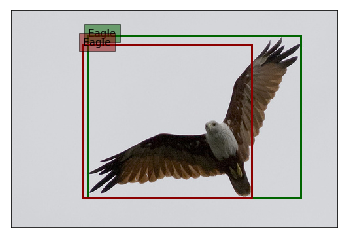

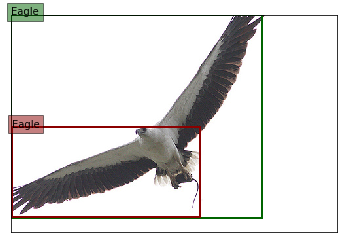

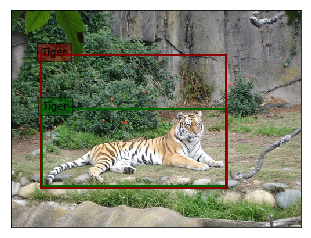

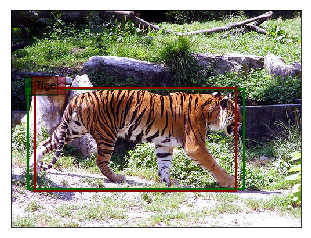

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

cls2name = {
    0: "Elephant",
    1: "Chimpanzee",
    2: "Antilop",
    3: "Bison",
    4: "Zebra",
    5: "Starfish",
    6: "Tiger",
    7: "Cat",
    8: "Dog",
    9: "Eagle"
}
for i in range(0, 100, 5):
    im = np.array(Image.open('data/test/images/' + str(i) + '.JPEG'), dtype=np.uint8)

    # Create figure and axes
    fig,ax = plt.subplots(1)


    ax.grid(False)

    ax.set_xticks([])
    ax.set_yticks([])

    # Display the image

    ax.imshow(im)

    startY_hat, startX_hat, endY_hat, endX_hat = y_hat_test_localization[i]
    startX, startY, endX, endY = y_test[i, 1:]
    startX, startY, endX, endY = int(startX), int(startY), int(endX), int(endY)
    startX_hat, startY_hat, endX_hat, endY_hat = int(startX_hat), int(startY_hat), int(endX_hat), int(endY_hat)

    rect = patches.Rectangle((startX, startY), endX - startX, endY - startY, linewidth=2, edgecolor='darkgreen',facecolor='none')
    ax.add_patch(rect)
    plt.text(startX, startY, cls2name[y_test[i, 0]], bbox=dict(facecolor='darkgreen', alpha=0.5))

    rect = patches.Rectangle((startX_hat, startY_hat), endX_hat - startX_hat, endY_hat - startY_hat, linewidth=2, edgecolor='darkred',facecolor='none')
    ax.add_patch(rect)
    plt.text(startX_hat, startY_hat, cls2name[real_predictions[i]], bbox=dict(facecolor='darkred', alpha=0.5))

    

    plt.savefig("plots/" + cls2name[real_predictions[i]] + str(i) + ".png")